<a href="https://colab.research.google.com/github/Jasmine-kaur8/Customer-Churn-Analysis-Project/blob/main/Customer_Churn_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Telecom_customer_churn.csv to Telecom_customer_churn.csv


Uploading the data

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#outlier removal
from numpy import percentile
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

Importing the required libraries

In [3]:
data = pd.read_csv('Telecom_customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Reading the data

In [4]:
data.shape

(7043, 21)

There are 7043 rows and 21 columns

In [5]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no null value.

In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


There are outliers in the monthly charges column.

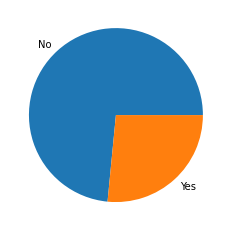

In [7]:
y = data['Churn'].value_counts()
labels = ["No","Yes"]

plt.pie(y, labels = labels)
plt.show()

There is problem of class imbalance

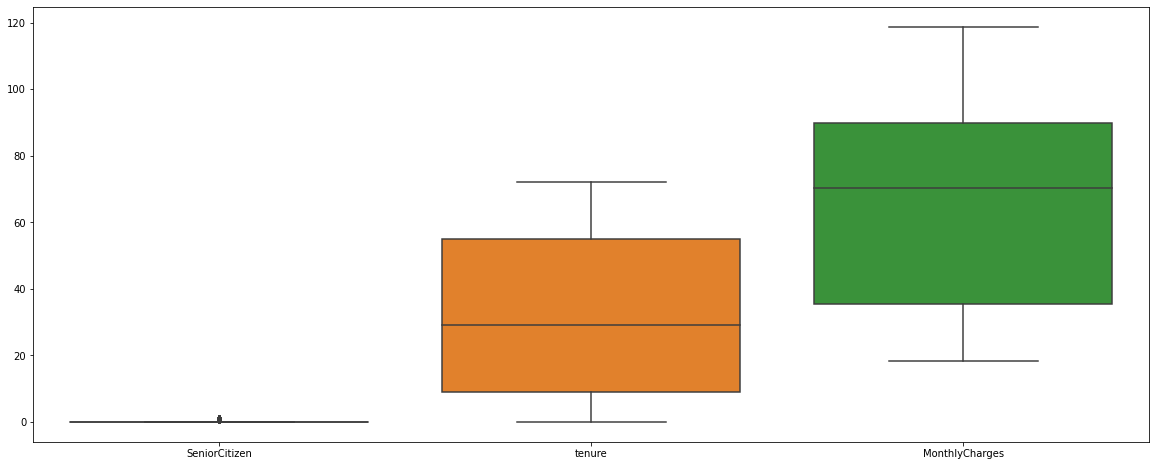

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.boxplot(data = data, ax=ax)
plt.show()

There are some outliers in the senior citizen.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2344280d10>,
      dtype=object)

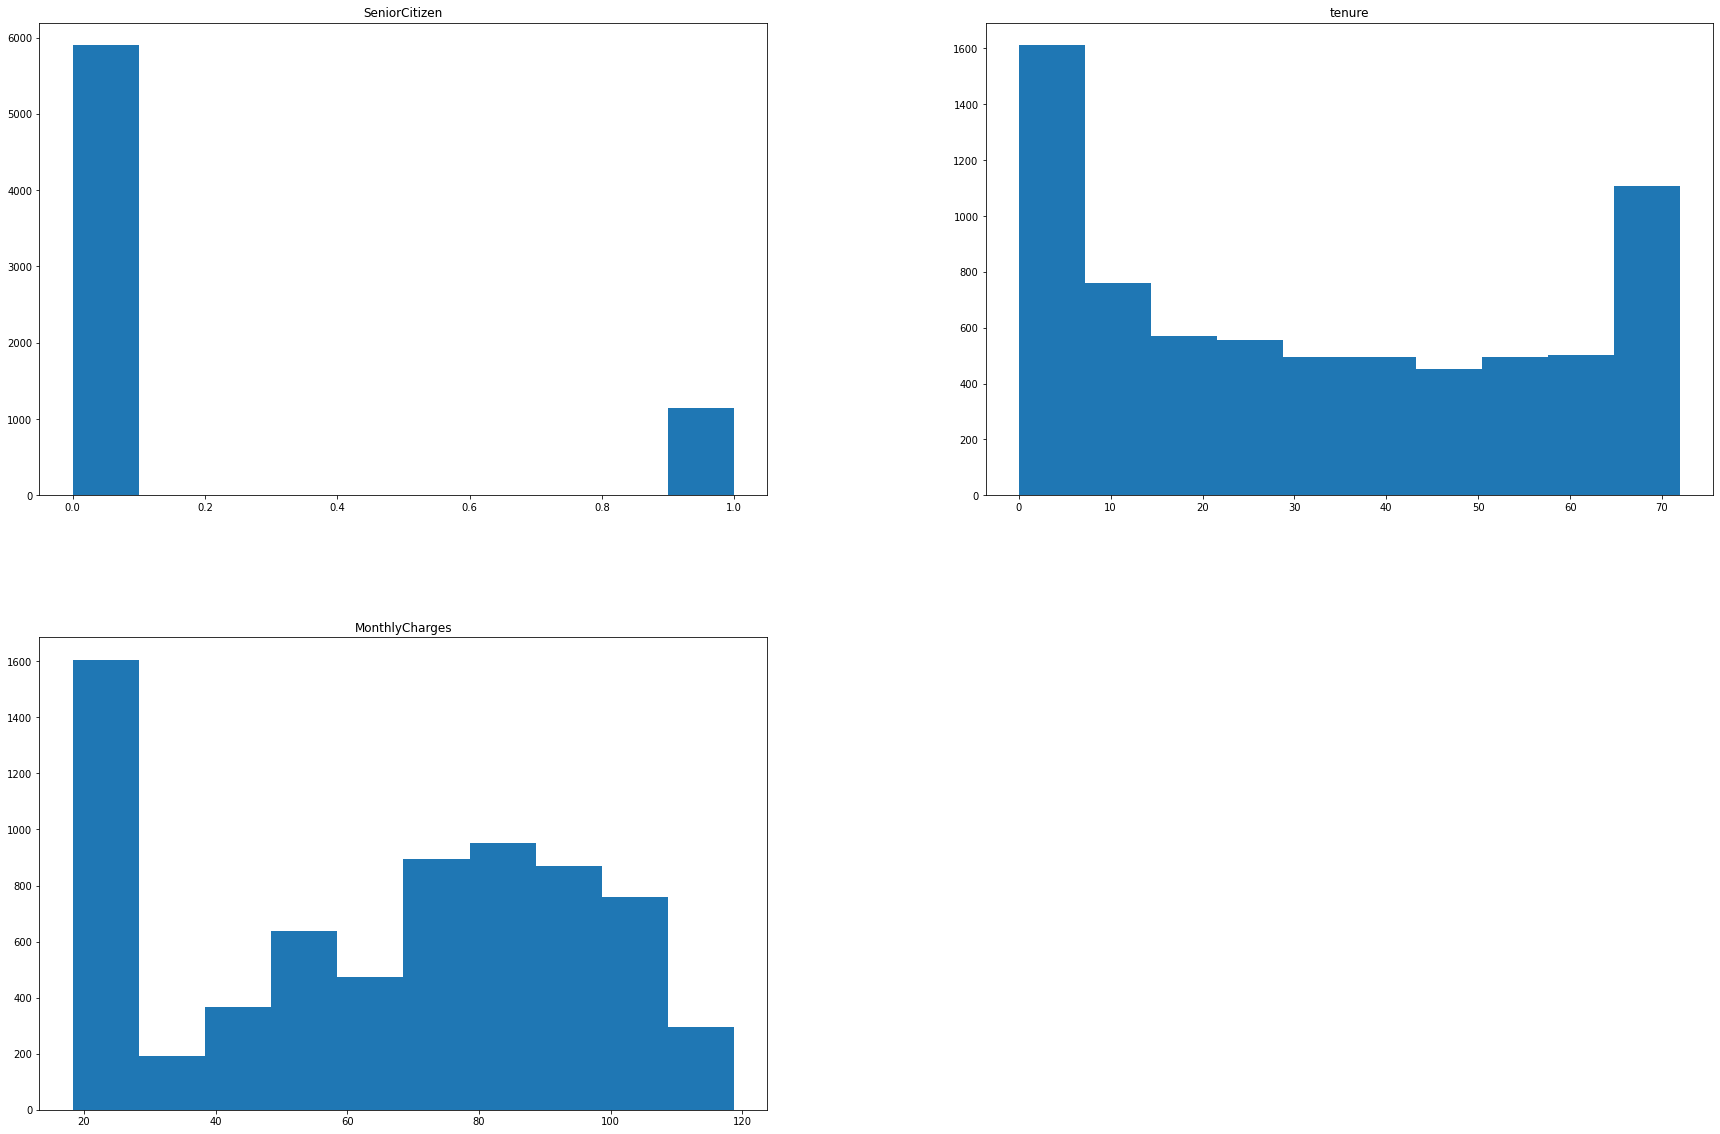

In [9]:
data.hist(figsize = (30,20), grid = False)

There is a litle skewness in the data.

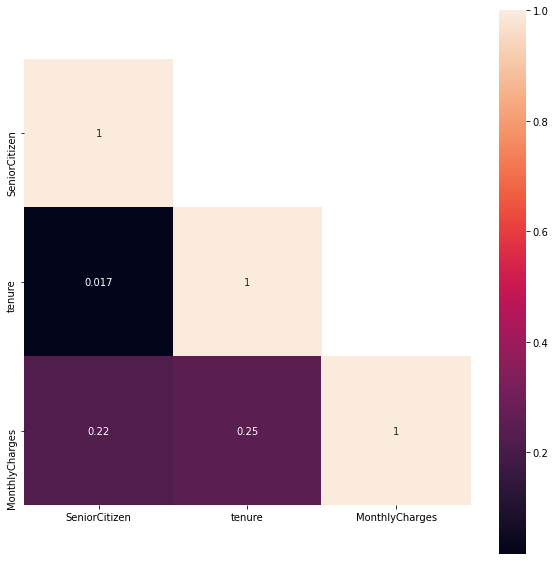

In [10]:
#Correlation Matrix

corr_mat = data.corr()
m = np.array(corr_mat)
m[np.tril_indices_from(m)] = False

fig = plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data = corr_mat, mask = m, square = True, annot = True, cbar = True)

There is no correlation  between features.

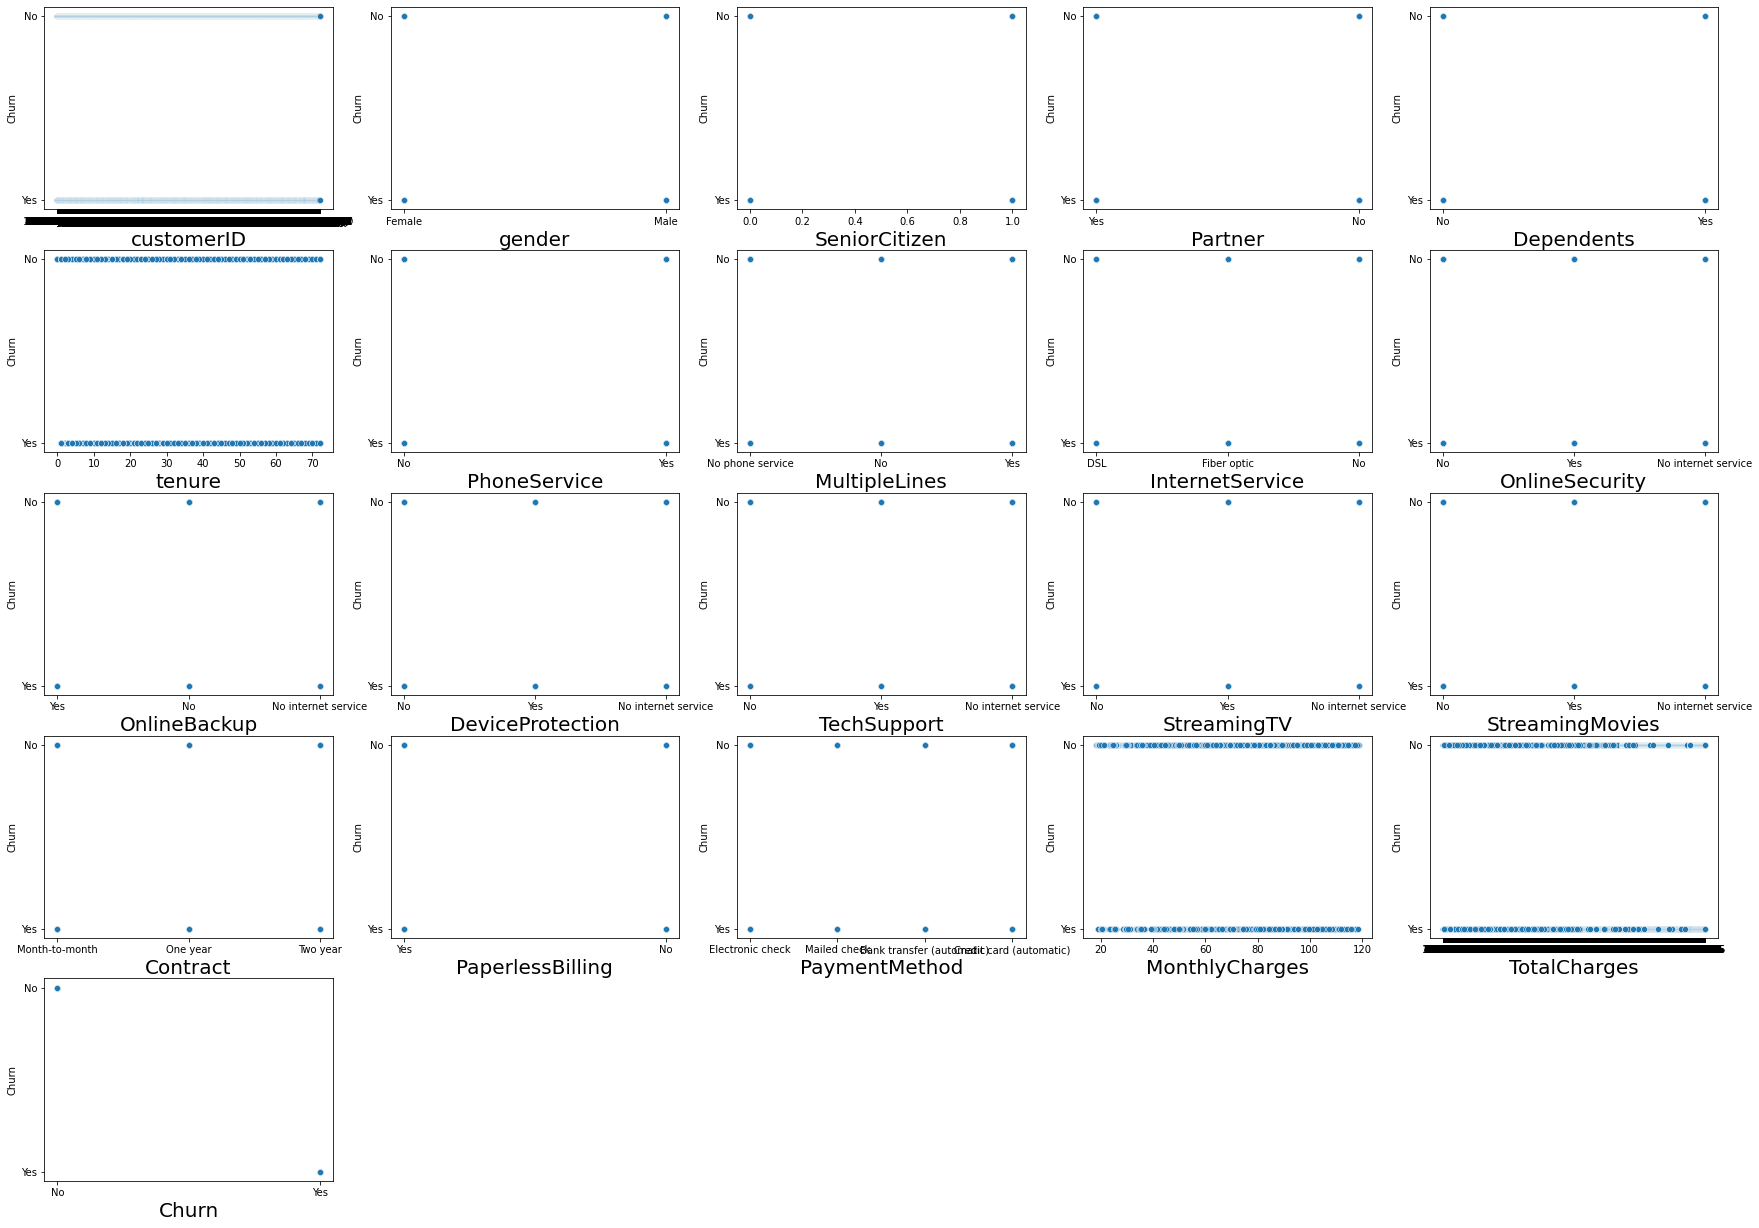

In [11]:

plt.figure(figsize = (30,35))
graph = 1

for column in data:
  if graph<=40:
    ax = plt.subplot(8,5,graph)
    sns.scatterplot(x = data[column], y = 'Churn', data = data)
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()


When total charges are high, there is high chances of churn. 

In [12]:
data.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

There is high skewness in the senior citizen column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot for Churn and Dependents')

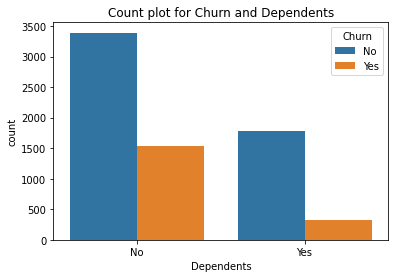

In [13]:
sns.countplot(data['Dependents'], hue = data['Churn'])
plt.title('Count plot for Churn and Dependents')

Those with no dependents are more likely to churn.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


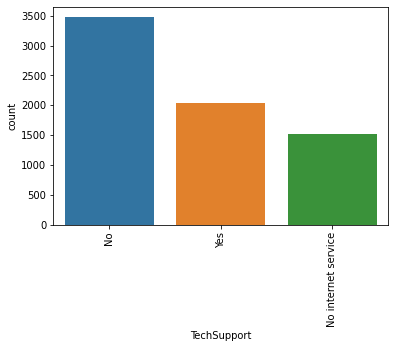

In [14]:
print(data['TechSupport'].value_counts())
sns.countplot(data['TechSupport'])
plt.xticks(rotation = 90);

The highest number of people don't have tech support, then some have tech support. Very few people don't have any internet service.

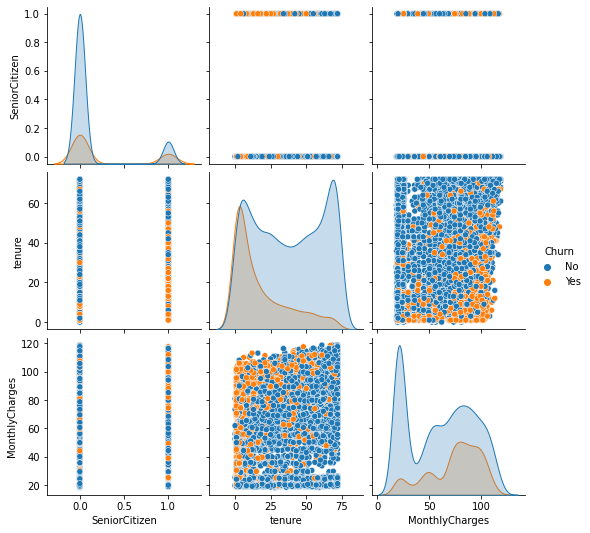

In [15]:
sns.pairplot(data, hue = 'Churn')

Senior citizen are more likely to churn. High monthly charges may lead to high churn rate. Those with high or low tenure time are more likely to churn.

In [16]:
#Treating the outliers

# findingout the quantile of data with continuous columns
col = data.drop(columns = ['customerID','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','TotalCharges','Churn'])
Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)
IQR = Q3 - Q1
# REMOVING OUTLIERS USING IQR METHOD
data_new = col[~((col < (Q1 -  1.5*IQR)) |(col > (Q3 +  1.5*IQR))).any(axis=1)]
print("shape before and after")
print("shape before".ljust(20),":", col.shape)
print("shape after".ljust(20),":", data_new.shape)
print("Percentage Loss".ljust(20),":", (col.shape[0]-data_new.shape[0])/col.shape[0])

shape before and after
shape before         : (7043, 3)
shape after          : (5901, 3)
Percentage Loss      : 0.1621468124378816


We are lossing 16% of the data, so can't apply IQR.

In [17]:
#Applying z score
from scipy.stats import zscore
z = np.abs(zscore(col))

col1 = col[(z<3).all(axis = 1)]

Applied z score

In [18]:
print("shape before and after")
print("shape before".ljust(20),":", col.shape)
print("shape after".ljust(20),":", col1.shape)
print("Percentage Loss".ljust(20),":", (col.shape[0]-col1.shape[0])/col.shape[0])

shape before and after
shape before         : (7043, 3)
shape after          : (7043, 3)
Percentage Loss      : 0.0


We are lossing 100% of the data, so can't apply z score.

In [19]:
data.drop('customerID',axis = 1, inplace = True)

dropped irrelevant column: customer id.

In [20]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

Imported label encoder

In [22]:
data['gender'] = lab_enc.fit_transform(data['gender'])
data['Partner'] = lab_enc.fit_transform(data['Partner'])
data['Dependents'] = lab_enc.fit_transform(data['Dependents'])
data['PhoneService'] = lab_enc.fit_transform(data['PhoneService'])
data['MultipleLines'] = lab_enc.fit_transform(data['MultipleLines'])
data['InternetService']= lab_enc.fit_transform(data['InternetService'])
data['OnlineSecurity'] = lab_enc.fit_transform(data['OnlineSecurity'])
data['OnlineBackup'] = lab_enc.fit_transform(data['OnlineBackup'])
data['DeviceProtection'] = lab_enc.fit_transform(data['DeviceProtection'])
data['TechSupport'] = lab_enc.fit_transform(data['TechSupport'])
data['StreamingTV'] = lab_enc.fit_transform(data['StreamingTV'])
data['StreamingMovies'] = lab_enc.fit_transform(data['StreamingMovies'])
data['Contract'] = lab_enc.fit_transform(data['Contract'])
data['PaperlessBilling'] = lab_enc.fit_transform(data['PaperlessBilling'])
data['PaymentMethod'] = lab_enc.fit_transform(data['PaymentMethod'])
data['TotalCharges'] = lab_enc.fit_transform(data['TotalCharges'])
data['Churn'] = lab_enc.fit_transform(data['Churn'])
data



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


Encoded the categorical data into the numerical data by using label encoder.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

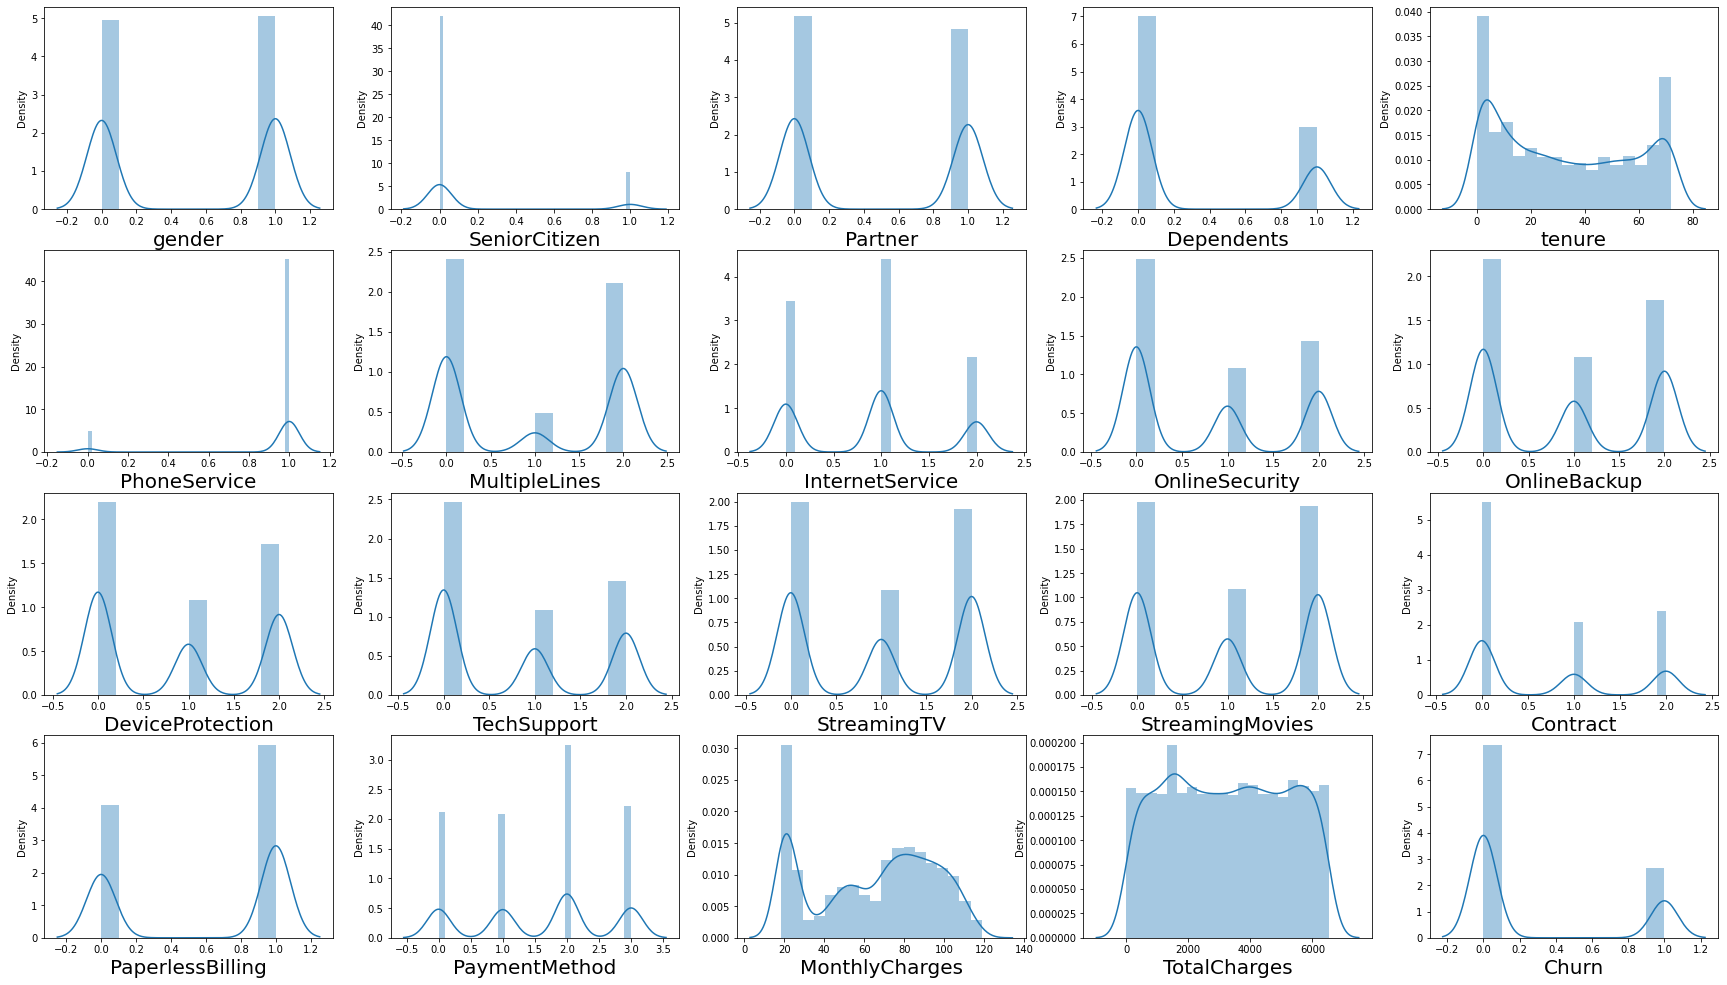

In [23]:
plt.figure(figsize = (30,35))
graph = 1

for column in data:
  if graph<=40:
    ax = plt.subplot(8,5,graph)
    sns.distplot(data[column])
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

There seems a little skewness in the data

In [24]:
#applying standard scaler:

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaler = StandardScaler()
x_scaled = scaler.fit_transform(data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Applied standard scaler.

In [25]:
x_scaled.shape[1]
vif = pd.DataFrame()

vif['Features'] = data.columns
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif

,Features,vif
0,gender,1.001727
1,SeniorCitizen,1.152237
2,Partner,1.460866
3,Dependents,1.382958
4,tenure,2.851293
5,PhoneService,1.633305
6,MultipleLines,1.393969
7,InternetService,1.837312
8,OnlineSecurity,1.259853
9,OnlineBackup,1.191804


VIF is less than 5 for all the features, thus there is no problem of multicollinearity.

In [27]:
#Spliting the data

Y = data['Churn']
X = data.drop(columns = ['Churn'])

Spliting the data into dependent and independent variable.

In [28]:
#Handling class imbalance problem by oversampling the minority classes.

from imblearn.over_sampling import SMOTE
SM = SMOTE()
X_over, Y_over = SM.fit_resample(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Oversampling to deal with the problem of class imbalance

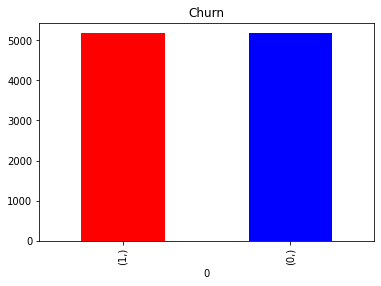

In [29]:
pd.DataFrame(Y_over).value_counts().plot(kind='bar', title='Churn', color=['r','b'])

Now, class is balanced.

In [30]:
 y = pd.Series(Y_over)
y

0        0
1        0
2        1
3        0
4        1
        ..
10343    1
10344    1
10345    1
10346    1
10347    1
Length: 10348, dtype: int64

Putting the y variable in a series.

In [31]:
x = pd.DataFrame(X_over)
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,29.850000,2505.000000
1,1.000000,0.000000,0.000000,0.000000,34.000000,1.0,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,56.950000,1466.000000
2,1.000000,0.000000,0.000000,0.000000,2.000000,1.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,53.850000,157.000000
3,1.000000,0.000000,0.000000,0.000000,45.000000,0.0,1.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,42.300000,1400.000000
4,0.000000,0.000000,0.000000,0.000000,2.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,70.700000,925.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,0.335999,0.664001,0.335999,0.335999,10.727988,1.0,2.000000,1.000000,0.000000,1.328001,0.000000,0.000000,0.671999,0.000000,0.000000,1.000000,2.000000,80.861598,1686.039992
10344,0.000000,0.000000,1.000000,0.000000,7.000000,1.0,1.203305,1.000000,0.000000,0.000000,0.796695,0.000000,2.000000,0.000000,0.000000,1.000000,2.000000,86.400413,4807.161996
10345,0.036233,0.000000,0.000000,0.000000,24.963767,1.0,0.072466,0.036233,1.927534,2.000000,1.927534,1.927534,1.927534,0.000000,0.963767,0.036233,2.963767,74.515586,1433.927534
10346,0.183832,0.000000,0.816168,0.816168,18.323368,1.0,0.367663,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.632337,0.000000,0.183832,2.000000,83.061019,1404.529347


Converted the columns into a dataframe.

In [32]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
(pt.fit(x))

PowerTransformer(copy=True, method='yeo-johnson', standardize=True)

Applied power transformer.

In [33]:
x1 = pd.DataFrame((pt.transform(x)))
x1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.080789,-0.560897,1.148398,-0.649694,-1.556893,-2.947314,0.259128,-1.353731,-0.878189,1.255380,-1.027204,-0.884036,-1.148848,-1.157818,-0.733203,0.796653,0.343481,-1.324807,-0.288985
1,1.035577,-0.560897,-0.951883,-0.649694,0.549349,0.345980,-1.093376,-1.353731,1.376197,-1.013710,1.242841,-0.884036,-1.148848,-1.157818,1.230156,-1.363738,1.435133,-0.431723,-0.888616
2,1.035577,-0.560897,-0.951883,-0.649694,-1.351285,0.345980,-1.093376,-1.353731,1.376197,1.255380,-1.027204,-0.884036,-1.148848,-1.157818,-0.733203,0.796653,1.435133,-0.538892,-1.942851
3,1.035577,-0.560897,-0.951883,-0.649694,0.853872,-2.947314,0.259128,-1.353731,1.376197,-1.013710,1.242841,1.372016,-1.148848,-1.157818,1.230156,-1.363738,-1.623021,-0.927641,-0.930568
4,-1.080789,-0.560897,-0.951883,-0.649694,-1.351285,0.345980,-1.093376,0.302757,-0.878189,-1.013710,-1.027204,-0.884036,-1.148848,-1.157818,-0.733203,0.796653,0.343481,0.056226,-1.253683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,-0.238422,1.832387,0.072151,1.074004,-0.459389,0.345980,1.092231,0.302757,-0.878189,0.821046,-1.027204,-0.884036,-0.161971,-1.157818,-0.733203,0.796653,0.343481,0.428677,-0.752782
10344,-1.080789,-0.560897,1.148398,-0.649694,-0.745088,0.345980,0.455161,0.302757,-0.878189,-1.013710,0.291065,-0.884036,1.125744,-1.157818,-0.733203,0.796653,0.343481,0.635495,0.812502
10345,-0.980382,-0.560897,-0.951883,-0.649694,0.242314,0.345980,-0.960840,-1.282337,1.351214,1.255380,1.201209,1.346488,1.068031,-1.157818,1.208445,-1.321151,1.394650,0.194975,-0.908928
10346,-0.597108,-0.560897,0.922556,1.562700,-0.036997,0.345980,-0.493361,0.302757,-0.878189,1.255380,-1.027204,-0.884036,-1.148848,0.812140,-0.733203,-1.122992,0.343481,0.510495,-0.927670


Converted the transformed data into a dataframe.

In [35]:
x1.columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
x1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.080789,-0.560897,1.148398,-0.649694,-1.556893,-2.947314,0.259128,-1.353731,-0.878189,1.25538,-1.027204,-0.884036,-1.148848,-1.157818,-0.733203,0.796653,0.343481,-1.324807,-0.288985
1,1.035577,-0.560897,-0.951883,-0.649694,0.549349,0.345980,-1.093376,-1.353731,1.376197,-1.01371,1.242841,-0.884036,-1.148848,-1.157818,1.230156,-1.363738,1.435133,-0.431723,-0.888616
2,1.035577,-0.560897,-0.951883,-0.649694,-1.351285,0.345980,-1.093376,-1.353731,1.376197,1.25538,-1.027204,-0.884036,-1.148848,-1.157818,-0.733203,0.796653,1.435133,-0.538892,-1.942851
3,1.035577,-0.560897,-0.951883,-0.649694,0.853872,-2.947314,0.259128,-1.353731,1.376197,-1.01371,1.242841,1.372016,-1.148848,-1.157818,1.230156,-1.363738,-1.623021,-0.927641,-0.930568
4,-1.080789,-0.560897,-0.951883,-0.649694,-1.351285,0.345980,-1.093376,0.302757,-0.878189,-1.01371,-1.027204,-0.884036,-1.148848,-1.157818,-0.733203,0.796653,0.343481,0.056226,-1.253683


Changed the names of headers.

In [45]:
#model building

X_train, X_test, y_train, y_test = train_test_split(
    x1, y, test_size=0.25, random_state=42)
models = [KNeighborsClassifier(), RandomForestClassifier(),
          DecisionTreeClassifier(), GradientBoostingClassifier()]
model_names = ['KNearestNeighbors', 'RandomForestClassifier', 'DecisionTree',
               'GradientBoostingClassifier']
acc = []

for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    acc.append(accuracy_score(pred, y_test))

models = {'Modelling Algorithm': model_names, 'Accuracy': acc}
models_df = pd.DataFrame(models)
models_df

,Modelling Algorithm,Accuracy
0,KNearestNeighbors,0.796289
1,RandomForestClassifier,0.862775
2,DecisionTree,0.807499
3,GradientBoostingClassifier,0.866641


Trained the model and got accuracy score of each model

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

imported libraries.

In [61]:
X1_train, X1_test, y1_train, y1_test = train_test_split(
    x1, y, test_size=0.25, random_state=50)

knn = KNeighborsClassifier()
knn.fit(X1_train,y1_train)

y1_pred = knn.predict(X1_test)
conf_mat1 = confusion_matrix(y1_test,y1_pred)
conf_mat1

array([[ 914,  396],
       [ 181, 1096]])

Confusion matrix of knn algorithm.

In [63]:
true_positive1 = conf_mat1[0][0]
false_positive1 = conf_mat1[0][1]
false_negative1= conf_mat1[1][0]
false_negative1 = conf_mat1[1][1]

auc1 = roc_auc_score(y1_test,y1_pred)
auc1



0.7779857370865639

auc score of knn is 77%

In [64]:
fpr1, tpr1, threshholds1 = roc_curve(y1_test, y1_pred)

print(fpr1)
print(tpr1)
print(threshholds1)

[0.         0.30229008 1.        ]
[0.         0.85826155 1.        ]
[2 1 0]


fpr, tpr and thrshhold of knn.

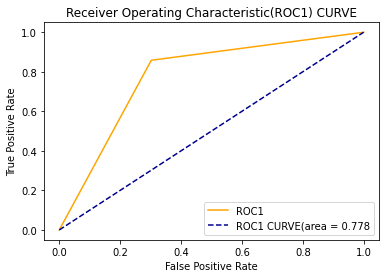

In [65]:

plt.plot(fpr1, tpr1, color = 'orange', label = 'ROC1')

plt.plot([0,1],[0,1],color = 'darkblue', linestyle = '--', label = 'ROC1 CURVE(area = %0.3f'%auc1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic(ROC1) CURVE')

plt.legend()

plt.show()

ROC curve of knn.

In [66]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
    x1, y, test_size=0.25, random_state=50)

rf = RandomForestClassifier()
rf.fit(X2_train,y2_train)

y2_pred = rf.predict(X2_test)
conf_mat2 = confusion_matrix(y2_test,y2_pred)
conf_mat2

array([[1161,  149],
       [ 205, 1072]])

Confusion matrix of random forest.

In [67]:
true_positive2 = conf_mat2[0][0]
false_positive2 = conf_mat2[0][1]
false_negative2 = conf_mat2[1][0]
false_negative2 = conf_mat2[1][1]

auc2 = roc_auc_score(y2_test,y2_pred)
auc2

0.8628635219712231

auc score of rf is 86%

In [68]:
fpr2, tpr2, threshholds2 = roc_curve(y2_test, y2_pred)

print(fpr2)
print(tpr2)
print(threshholds2)

[0.         0.11374046 1.        ]
[0.        0.8394675 1.       ]
[2 1 0]


fpr, tpr, threshholds of rf

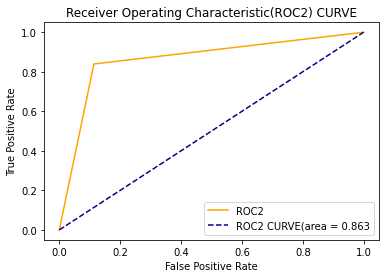

In [69]:

plt.plot(fpr2, tpr2, color = 'orange', label = 'ROC2')

plt.plot([0,1],[0,1],color = 'darkblue', linestyle = '--', label = 'ROC2 CURVE(area = %0.3f'%auc2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic(ROC2) CURVE')

plt.legend()

plt.show()

ROC curve of rf.

In [70]:
X3_train, X3_test, y3_train, y3_test = train_test_split(
    x1, y, test_size=0.25, random_state=50)

dtc = DecisionTreeClassifier()
dtc.fit(X3_train,y3_train)

y3_pred = dtc.predict(X3_test)
conf_mat3 = confusion_matrix(y3_test,y3_pred)
conf_mat3

array([[1070,  240],
       [ 252, 1025]])

Confusion matrix of dtc.

In [71]:
true_positive3 = conf_mat3[0][0]
false_positive3 = conf_mat3[0][1]
false_negative3 = conf_mat3[1][0]
false_negative3 = conf_mat3[1][1]

auc3 = roc_auc_score(y3_test,y3_pred)
auc3

0.8097281916706021

auc score of dtc is 80%

In [72]:
fpr3, tpr3, threshholds3 = roc_curve(y3_test, y3_pred)

print(fpr3)
print(tpr3)
print(threshholds3)

[0.         0.18320611 1.        ]
[0.         0.80266249 1.        ]
[2 1 0]


fpr, tpr, threshholds of dtc

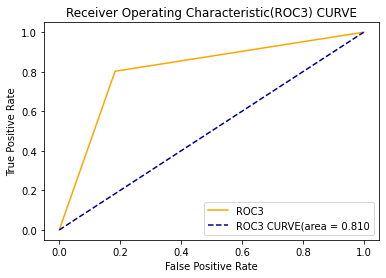

In [74]:
plt.plot(fpr3, tpr3, color = 'orange', label = 'ROC3')

plt.plot([0,1],[0,1],color = 'darkblue', linestyle = '--', label = 'ROC3 CURVE(area = %0.3f'%auc3)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic(ROC3) CURVE')

plt.legend()

plt.show()

ROC curve of dtc.

In [75]:
X4_train, X4_test, y4_train, y4_test = train_test_split(
    x1, y, test_size=0.25, random_state=50)

gb = GradientBoostingClassifier()
gb.fit(X4_train,y4_train)

y4_pred = gb.predict(X4_test)
conf_mat4 = confusion_matrix(y4_test,y4_pred)
conf_mat4

array([[1145,  165],
       [ 176, 1101]])

Confusion matrix of gb

In [76]:
true_positive4 = conf_mat4[0][0]
false_positive4 = conf_mat4[0][1]
false_negative4 = conf_mat4[1][0]
false_negative4 = conf_mat4[1][1]

auc4 = roc_auc_score(y4_test,y4_pred)
auc4

0.8681113894086213

auc score of gb is 86%

In [77]:
fpr4, tpr4, threshholds4 = roc_curve(y4_test, y4_pred)

print(fpr4)
print(tpr4)
print(threshholds4)

[0.        0.1259542 1.       ]
[0.         0.86217698 1.        ]
[2 1 0]


fpr, tpr, threshholds of gb

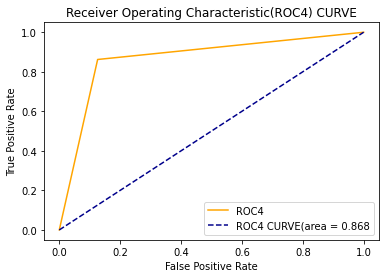

In [78]:
plt.plot(fpr4, tpr4, color = 'orange', label = 'ROC4')

plt.plot([0,1],[0,1],color = 'darkblue', linestyle = '--', label = 'ROC4 CURVE(area = %0.3f'%auc4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic(ROC4) CURVE')

plt.legend()

plt.show()

ROC curve of gb

In [39]:
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
dtc = DecisionTreeClassifier()
gb = GradientBoostingClassifier()

Intializing the classifiers.

In [46]:
#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
#Classification report
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.7962891379976808
Precision: 0.7506578947368421
Recall: 0.8851823118696664
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.71      0.78      1298
           1       0.75      0.89      0.81      1289

    accuracy                           0.80      2587
   macro avg       0.81      0.80      0.79      2587
weighted avg       0.81      0.80      0.79      2587



CLassification report of knn

In [47]:
#Train the model using the training sets
rf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = rf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
#Classification report
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.8635485117897178
Precision: 0.8887043189368771
Recall: 0.8301008533747091
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1298
           1       0.89      0.83      0.86      1289

    accuracy                           0.86      2587
   macro avg       0.87      0.86      0.86      2587
weighted avg       0.87      0.86      0.86      2587



classification report of rf.

In [48]:
#Train the model using the training sets
dtc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = dtc.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
#Classification report
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.8013142636258214
Precision: 0.8001549186676995
Recall: 0.8013964313421257
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1298
           1       0.80      0.80      0.80      1289

    accuracy                           0.80      2587
   macro avg       0.80      0.80      0.80      2587
weighted avg       0.80      0.80      0.80      2587



classification report of dtc

In [49]:
#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
#Classification report
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.8666408967916506
Precision: 0.8716535433070867
Recall: 0.8588052754072925
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87      1298
           1       0.87      0.86      0.87      1289

    accuracy                           0.87      2587
   macro avg       0.87      0.87      0.87      2587
weighted avg       0.87      0.87      0.87      2587



classification report of gb

In [51]:
#Now, let's apply cross validation 

from sklearn.model_selection import KFold, cross_val_score,GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)
models = [KNeighborsClassifier(), RandomForestClassifier(),
          DecisionTreeClassifier(), GradientBoostingClassifier()]
model_names = ['KNearestNeighbors', 'RandomForestClassifier', 'DecisionTree',
               'GradientBoostingClassifier']


k_f = KFold(n_splits = 4, shuffle = True)
k_f

CV_S = []

for model in range(len(models)):
    clf = models[model]
    c = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    CV_S.append(cross_val_score(c, x1, y, cv = 5).mean())
    

CV = {'Modelling Algorithm': model_names, 'CV SCORE': CV_S}
CV_df = pd.DataFrame(CV)
CV_df

,Modelling Algorithm,CV SCORE
0,KNearestNeighbors,0.787499
1,RandomForestClassifier,0.839021
2,DecisionTree,0.795821
3,GradientBoostingClassifier,0.837666


Cross validation of all the models.

In [52]:
#Comparing CV Score and the Accuracy score:

Comparison = pd.DataFrame({})
Comparison['Modelling Algorithm'] =  model_names
Comparison['ACCURACY'] = acc
Comparison['CV SCORE'] = CV_S
Comparison['Difference'] = [acc[0] - CV_S[0], acc[1] - CV_S[1], acc[2] - CV_S[2], acc[3] - CV_S[3]]
Comparison

,Modelling Algorithm,ACCURACY,CV SCORE,Difference
0,KNearestNeighbors,0.796289,0.787499,0.008790
1,RandomForestClassifier,0.862775,0.839021,0.023754
2,DecisionTree,0.807499,0.795821,0.011678
3,GradientBoostingClassifier,0.866641,0.837666,0.028974


The difference is minimum for KNearestAlgorithm

In [53]:
#HYPERPARAMETER TUNING:

grid_param = {
    'n_neighbors' : range(2,8,2),
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : range(20,40,5)
}

Applied hyperparameter tuning

In [54]:
grid = GridSearchCV(knn, param_grid = grid_param)

applied grid search CV

In [55]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': range(20, 40, 5),
                         'n_neighbors': range(2, 8, 2),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Trained the model

In [56]:
best_parameters = grid.best_params_
print(best_parameters)

{'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 2, 'weights': 'distance'}


Got the best parameters.

In [57]:

#FINAL MODEL
#Substituting the best parameters in the KNeighborsClassifier:

KNN = KNeighborsClassifier(algorithm = 'auto', leaf_size = 25, n_neighbors = 2, weights = 'distance')

KNN.fit(X_train, y_train)
KNN.score(X_test,y_test)

0.8044066486277541

The final model with 80% of accuracy score.

In [58]:
#SAVING THE MODEL:

import joblib
joblib.dump(KNN, 'churn_analysis_final_model.pkl')

['churn_analysis_final_model.pkl']

Saved the model.